1 Importing necessary modules

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

2 Reading my Data

In [30]:

df1=df[['Gender','Age at enrollment','Tuition fees up to date','Scholarship holder','Unemployment rate','Target']]
df1.head()

,Gender,Age at enrollment,Tuition fees up to date,Scholarship holder,Unemployment rate,Target
0,1,20,1,0,10.8,Dropout
1,1,19,0,0,13.9,Graduate
2,1,19,0,0,10.8,Dropout
3,0,20,1,0,9.4,Graduate
4,0,45,1,0,13.9,Graduate


In [31]:
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   4424 non-null   int64  
 1   Age at enrollment        4424 non-null   int64  
 2   Tuition fees up to date  4424 non-null   int64  
 3   Scholarship holder       4424 non-null   int64  
 4   Unemployment rate        4424 non-null   float64
 5   Target                   4424 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 207.5+ KB


In [32]:
#remove graduate from target column
target_to_remove=['Graduate']
for target in target_to_remove:
    df1=df1[df1['Target'] != target]

df1.Target.unique()

array(['Dropout', 'Enrolled'], dtype=object)

In [33]:
#change Target to binary
#1-dropout
#0-Enrolled
df1['Target']=df1['Target'].apply(lambda x: 1 if x=='Dropout' else 0)

In [34]:
df1.head()

,Gender,Age at enrollment,Tuition fees up to date,Scholarship holder,Unemployment rate,Target
0,1,20,1,0,10.8,1
2,1,19,0,0,10.8,1
7,1,22,0,0,15.5,1
9,0,18,0,0,8.9,1
12,0,19,1,0,12.7,1


In [35]:
#drop age above 40
#rename age at enrollment to age
df1.rename(columns={'Age at enrollment':'Age'},inplace=True)
age_to_drop=list(range(40,71))
for age in age_to_drop:
    df1=df1[df1['Age'] != age]

In [36]:
#rename tuition fees upto date to School fees upto date
df1.rename(columns={'Tuition fees up to date':'School fees upto date'},inplace=True)
df1.columns


Index(['Gender', 'Age', 'School fees upto date', 'Scholarship holder',
       'Unemployment rate', 'Target'],
      dtype='object')

In [37]:
#drop rows 
df1.shape
df1=df1.iloc[:-1640,:]
df1.shape

(418, 6)

In [38]:
#read elvos dataset
#df1.head()
elvo=pd.read_excel('elvin.xlsx')
elvo.head()

,1. Select your gender?,4. How many hours of sleep do you get on average per night on school nights?,5. Do you experience difficulty falling asleep or staying a sleep?,6. On a scale 1-5 with 1 being poor and 5 being excellent select the quality of your sleep?,7. Are you involved in any extracurricular activities such as sports arts or community service?,8. On average how many hours per week do you dedicate to extracurricular activities?,9. Do you believe that participating in extracurricular activities has an positive impact in your academic performance?,10. Do you experience feelings of stress and anxiety related to academics?,"11. On a scale of 1-5 rate, you level of academic stress: (1 being very low and 5 very high)",12. Are you aware of the mental health resources and support services provided by the university?,...,12. Are you aware of the mental health resources and support services provided by the university?.1,13. Have you ever sought counselling or mental health support for academic related stress or emotional well-being?.1,14. Do you have a structured study routine to manage your academic workload?.1,15. On a scale on 1 – 5 rate your ability to maintain focus and avoid distractions while studying.1,16. Do you procrastinate on academic tasks?.1,17. On a scale of 1 – 5 with 1 being ineffective and 5 being highly effective rate the overall quality of teaching at your university?.1,18. Do you find that certain teaching techniques help you understand and retain subject matter better than others?.1,19. If you answered “YES” to the previous question please select the techniques that help you retain subject matter..1,20. On a scale of 1-5 rate your overall academic performance (1 being poor and 5 excellent)?.1,9. Do you believe that participating in extracurricular activities has an positive impact in your academic performance?.2
0,male,4 - 6hrs,YES,2,NO,NaN,YES,YES,2,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,4 - 6hrs,No,4,YES,Mores than 10hrs,YES,NO,2,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,male,4 - 6hrs,No,3,YES,2 - 3 hrs,YES,YES,2,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male,4 - 6hrs,No,4,YES,2 - 3 hrs,NO,YES,3,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male,7 - 8hrs,YES,2,NO,4 - 6 hrs,NO,YES,3,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
elvo.columns=elvo.columns.to_series().apply(lambda x:x.strip())
elvo=elvo[['1. Select your gender?','10.   Do you experience feelings of stress and anxiety related to academics?',
           '13. Have you ever sought counselling or mental health support for academic related stress or emotional well-being?',
           '17.  On a scale of 1 – 5 with 1 being ineffective and 5 being highly effective rate the overall quality of teaching at your university?',
           '20. On a scale of 1-5 rate your overall academic performance (1 being poor and 5 excellent)?']]

In [40]:
elvo.columns=['Gender','Academic stress and anxiety','Seek counselling and mental health support','Quality of teaching','Academic performance']

In [41]:
elvo.columns
elvo.head()
elvo.shape

(402, 5)

In [42]:
elvo.dropna()
elvo.isnull().sum()

Gender                                        0
Academic stress and anxiety                   0
Seek counselling and mental health support    0
Quality of teaching                           0
Academic performance                          0
dtype: int64

In [43]:
#change gender to binary 
elvo['Gender']=elvo['Gender'].apply(lambda x: 1 if x=='male' else 0 )
elvo['Gender'].unique()
elvo.head()

,Gender,Academic stress and anxiety,Seek counselling and mental health support,Quality of teaching,Academic performance
0,1,YES,NO,3,3
1,1,NO,NO,3,4
2,1,YES,NO,3,2
3,1,YES,NO,3,4
4,1,YES,NO,4,5


In [44]:
#change acdemic stress to binary
elvo['Academic stress and anxiety']=elvo['Academic stress and anxiety'].apply(lambda x: 1 if x=='YES' else 0)

In [45]:
#change counselling and mental health to binary
elvo['Seek counselling and mental health support']=elvo['Seek counselling and mental health support'].apply(lambda x:1 if x=='YES' else 0)

In [46]:
elvo.head()

,Gender,Academic stress and anxiety,Seek counselling and mental health support,Quality of teaching,Academic performance
0,1,1,0,3,3
1,1,0,0,3,4
2,1,1,0,3,2
3,1,1,0,3,4
4,1,1,0,4,5


In [47]:
elvin=elvo.merge(df1,how='inner',on='Gender')
elvin.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76920 entries, 0 to 76919
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      76920 non-null  int64  
 1   Academic stress and anxiety                 76920 non-null  int64  
 2   Seek counselling and mental health support  76920 non-null  int64  
 3   Quality of teaching                         76920 non-null  int64  
 4   Academic performance                        76920 non-null  int64  
 5   Age                                         76920 non-null  int64  
 6   School fees upto date                       76920 non-null  int64  
 7   Scholarship holder                          76920 non-null  int64  
 8   Unemployment rate                           76920 non-null  float64
 9   Target                                      76920 non-null  int64  
dtypes: float64

In [48]:
elvin.head(30)
elvin.dropna()
elvin['Gender'].value_counts()

0    48600
1    28320
Name: Gender, dtype: int64

In [49]:
#elvin['Dropout'].value_counts()
elvin.head()
elvin.rename(columns={'Target':'Dropout'},inplace=True)
drop=elvin

In [50]:

drop =drop.sample(frac=0.006,random_state=1,replace=True)


In [51]:
drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 5192 to 21275
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      462 non-null    int64  
 1   Academic stress and anxiety                 462 non-null    int64  
 2   Seek counselling and mental health support  462 non-null    int64  
 3   Quality of teaching                         462 non-null    int64  
 4   Academic performance                        462 non-null    int64  
 5   Age                                         462 non-null    int64  
 6   School fees upto date                       462 non-null    int64  
 7   Scholarship holder                          462 non-null    int64  
 8   Unemployment rate                           462 non-null    float64
 9   Dropout                                     462 non-null    int64  
dtypes: float6

In [52]:
drop.index=list(range(0,462))
drop.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            452, 453, 454, 455, 456, 457, 458, 459, 460, 461],
           dtype='int64', length=462)

In [53]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.3

# Identify specific values in 'ColumnA' to change
values_to_change = [4, 5]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Quality of teaching'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 0  # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


In [54]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.2

# Identify specific values in 'ColumnA' to change
values_to_change = [2, 3]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Quality of teaching'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 0 # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


In [84]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.05

# Identify specific values in 'ColumnA' to change
values_to_change = [2]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Quality of teaching'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 1 # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


In [56]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.3

# Identify specific values in 'ColumnA' to change
values_to_change = [4, 5]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Academic performance'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 0  # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


In [57]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.04

# Identify specific values in 'ColumnA' to change
values_to_change = [2]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Academic performance'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 1  # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


In [322]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.05

# Identify specific values in 'ColumnA' to change
values_to_change = [1]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Academic performance'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 1  # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


In [59]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.3

# Identify specific values in 'ColumnA' to change
values_to_change = [1]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Academic stress and anxiety'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 1  # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


In [207]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.3

# Identify specific values in 'ColumnA' to change
values_to_change = [0]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Seek counselling and mental health support'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 0 # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


In [61]:
drop['Quality of teaching'].value_counts()

3    216
4    132
2     48
5     39
1     27
Name: Quality of teaching, dtype: int64

3 Exploratory Analysis

        3.1 General distribution of variables

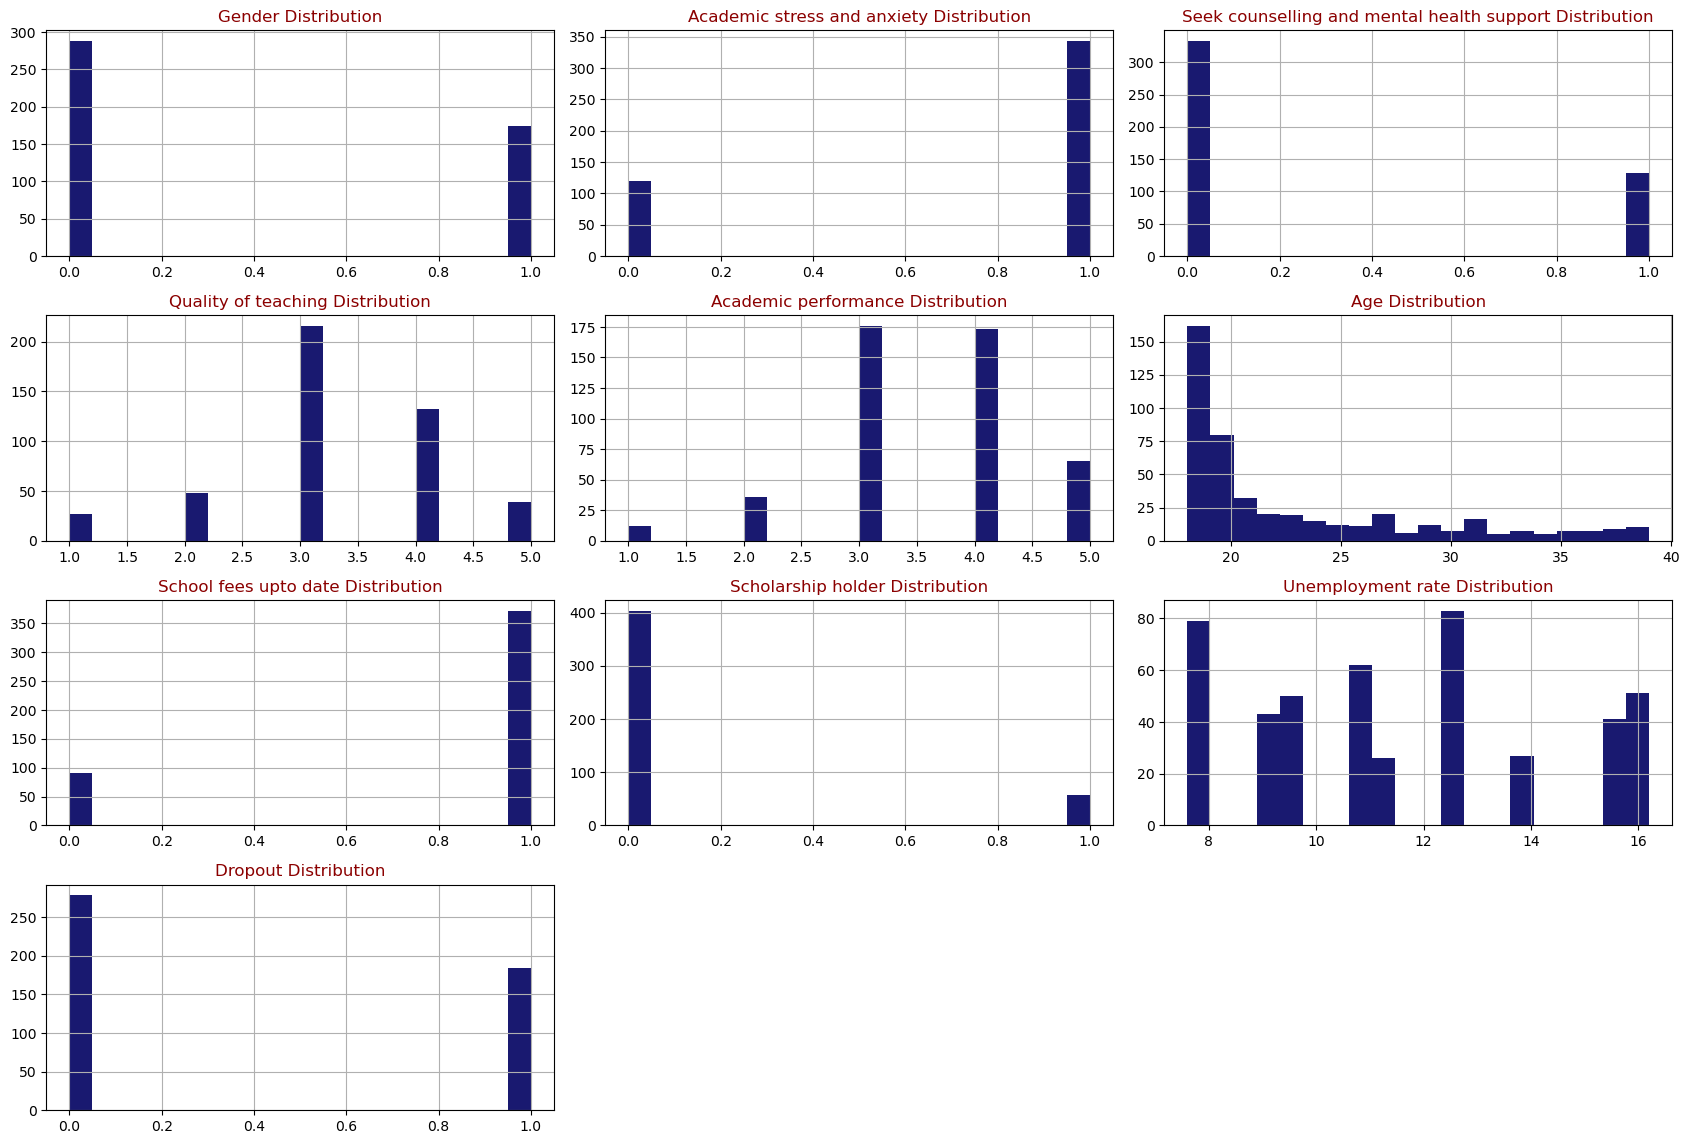

In [62]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(17,17))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(drop,drop.columns,6,3)

<AxesSubplot:xlabel='Dropout', ylabel='count'>

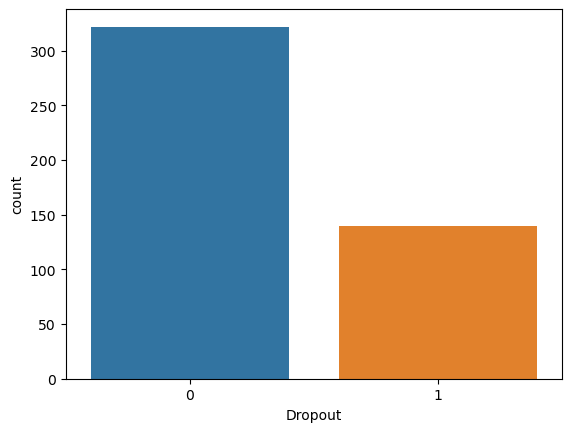

In [304]:
#count plot of target variable
sns.countplot(x='Dropout',data=drop)


In [64]:
#df.reset_index(drop=True)
#new_index=list(range(1,463))
#drop.reindex(new_index)
#drop.head()
#sns.pairplot(data=drop)

     3.2 Exploratin by age

In [292]:


# Fraction of specific values in 'ColumnA' to change 
fraction_to_change = 0.3

# Identify specific values in 'ColumnA' to change
values_to_change = [18,19,20,21,22,23,24,25]

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop[drop['Age'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
new_value_in_column_b = 0 # Replace 0 with the desired new value
drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


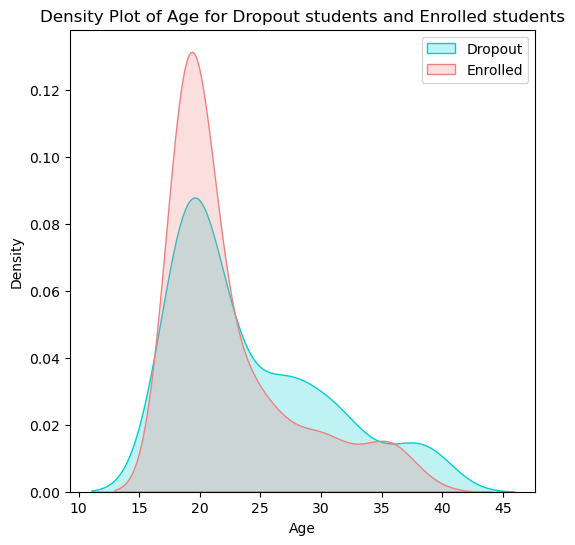

In [323]:
plt.figure(figsize=(6,6))
ax = sns.kdeplot(drop["Age"][drop.Dropout == 1], color="darkturquoise", shade=True)
sns.kdeplot(drop["Age"][drop.Dropout == 0], color="lightcoral", shade=True)
plt.legend(['Dropout', 'Enrolled'])
plt.title('Density Plot of Age for Dropout students and Enrolled students')
ax.set(xlabel='Age')
#plt.xlim(-2,60)
plt.show()

#majority of the students between the age of 18 and 24 are enrolled
#As age increases the number of dropout significantly increases


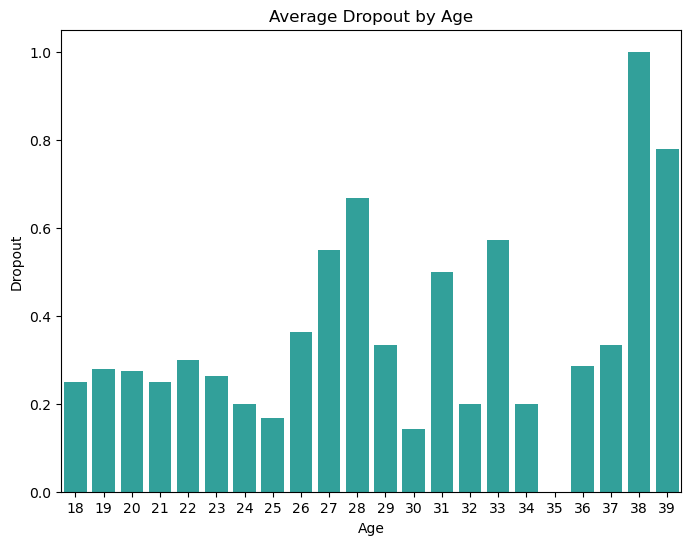

In [294]:
plt.figure(figsize=(8,6))
avg_dropout_byage=drop[['Age','Dropout']].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Dropout', data=avg_dropout_byage, color="LightSeaGreen")
plt.title('Average Dropout by Age')
plt.show()


#The output shows a difference in dropout among young students and older ones
#Older students tend to dropout of school


    3.3 Exploration by Gender

In [67]:
gender_counts =drop['Gender'].value_counts()
gender_counts

0    288
1    174
Name: Gender, dtype: int64

In [307]:
# Fraction of values in 'Family crisis' to change 
fraction_to_change = 0.1

# Number of rows to change based on the fraction
um_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop.sample(n=num_rows_to_change).index

# Change the values in the selected rows of 'Family crisis'
new_value =1
  
drop.loc[rows_to_change, 'Gender'] = new_value

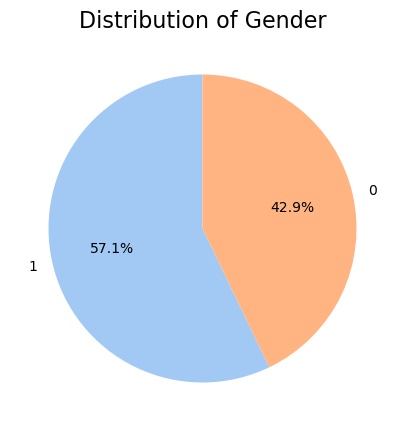

In [308]:
gender_counts =drop['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Gender', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Dropout by Gender')

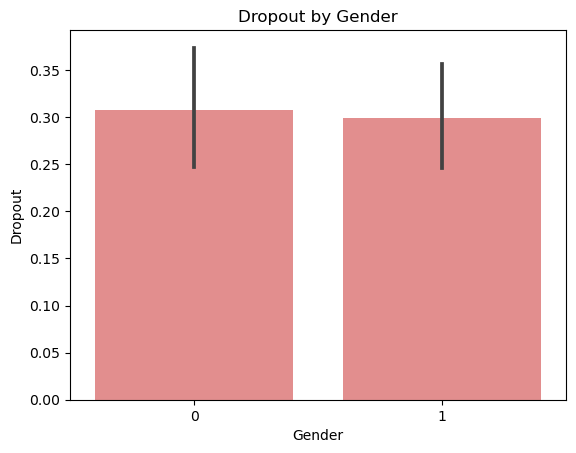

In [309]:
sns.barplot(x='Gender',y='Dropout',data=drop,color='lightcoral')
plt.title('Dropout by Gender')

#male students tend to dropout of school as compared to female students
#male students are likely to dropout as compared to female students

    3.4 Exploration by Academic stress and anxiety

Text(0.5, 1.0, 'Dropout by Academic Stress and Anxiety')

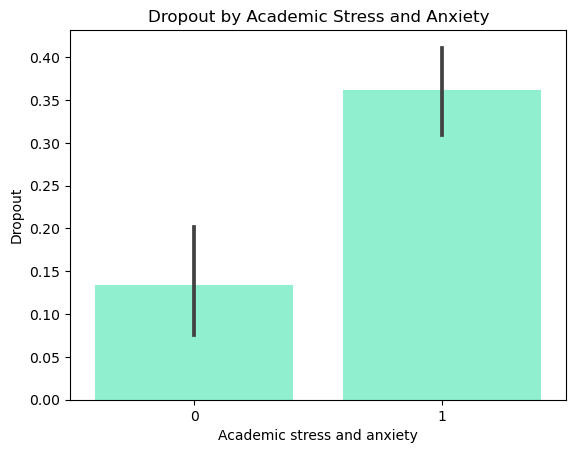

In [310]:
sns.barplot(x='Academic stress and anxiety',y='Dropout',data=drop,color='aquamarine')
plt.title('Dropout by Academic Stress and Anxiety')

#students experiencing academic stress are not likely to dropout 

    3.5 Exploration by Academic performance

In [369]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(drop["Academic performance"],drop['Dropout'])
contingency_table
chi_model=chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
chi_model

(31.3653376181744,
 2.578511085111033e-06,
 4,
 array([[  8.23376623,   3.76623377],
        [ 24.7012987 ,  11.2987013 ],
        [120.76190476,  55.23809524],
        [118.7034632 ,  54.2965368 ],
        [ 44.5995671 ,  20.4004329 ]]))

Text(0.5, 1.0, 'Dropout by Academic Performance')

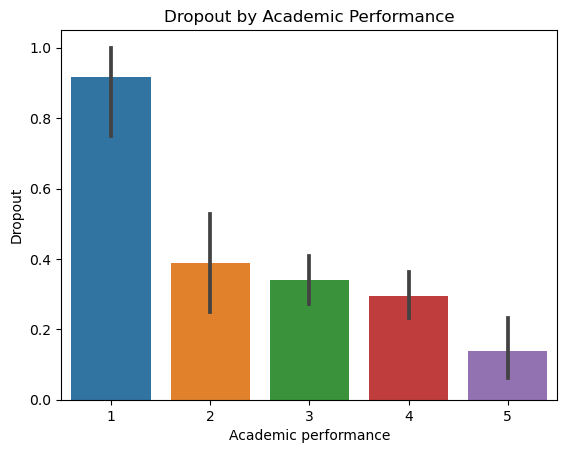

In [324]:
sns.barplot(x='Academic performance',y='Dropout',data=drop)
plt.title('Dropout by Academic Performance')
#students with poor grades are more likely to dropout 
#average students have a high probability of being enrolled

    3.6 Exploration by Seeeking Counselling and Mental Health Support

Text(0.5, 1.0, 'Dropout by Seeking Couselling and Mental Health Support ')

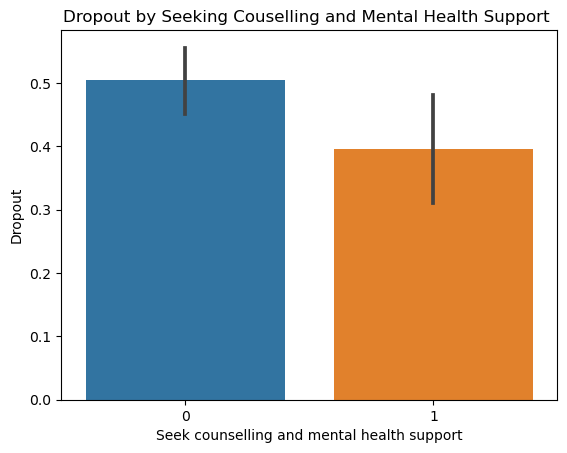

In [266]:


sns.barplot(x='Seek counselling and mental health support',y='Dropout',data=drop)
plt.title('Dropout by Seeking Couselling and Mental Health Support ')



    3.7 Exploration by Quality of Teaching

In [378]:
#from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(drop["Quality of teaching"],drop['Dropout'])
print(contingency_table)
chi_model=chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi_model)

Dropout                0   1
Quality of teaching         
1                     15  12
2                     32  16
3                    137  79
4                    101  31
5                     32   7
(12.018805557182585, 0.017211968798038713, 4, array([[ 18.52597403,   8.47402597],
       [ 32.93506494,  15.06493506],
       [148.20779221,  67.79220779],
       [ 90.57142857,  41.42857143],
       [ 26.75974026,  12.24025974]]))


Text(0.5, 1.0, 'Dropout by Quality of Teaching ')

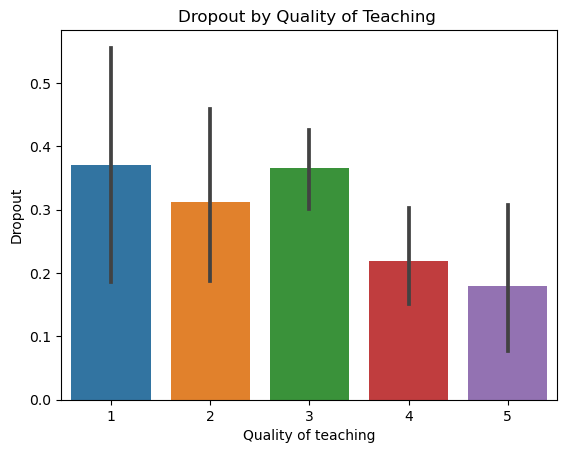

In [312]:
sns.barplot(x='Quality of teaching',y='Dropout',data=drop)
plt.title('Dropout by Quality of Teaching ')

    3.8 Exploration by School Fees upto date

In [377]:
#from scipy.stats import chi2_contingency
contingency_table3=pd.crosstab(drop["School fees upto date"],drop['Dropout'])
print(contingency_table3)
chi_model3=chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table3)
print(chi_model3)

Dropout                  0    1
School fees upto date          
0                       45   45
1                      272  100
(16.927525255892455, 3.883436695714838e-05, 1, array([[ 61.75324675,  28.24675325],
       [255.24675325, 116.75324675]]))


Text(0.5, 1.0, 'Dropout by School fees upto date')

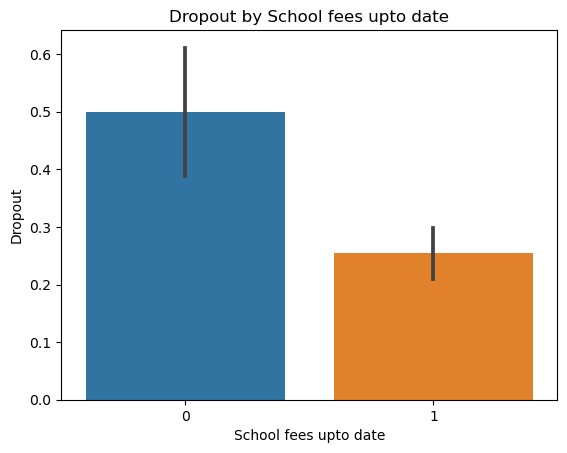

In [314]:
sns.barplot(x='School fees upto date',y='Dropout',data=drop)
plt.title('Dropout by School fees upto date')

    3.9 Exploration by Scholarship holder

In [379]:
#from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(drop["Scholarship holder"],drop['Dropout'])
print(contingency_table)
chi_model=chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi_model)

Dropout               0    1
Scholarship holder          
0                   276  128
1                    41   17
(0.045307706068903685, 0.8314392290314295, 1, array([[277.2034632, 126.7965368],
       [ 39.7965368,  18.2034632]]))


Text(0.5, 1.0, 'Dropout by Scholarship holder')

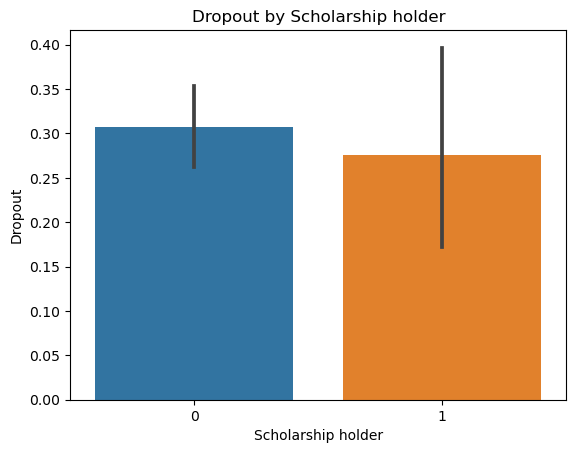

In [313]:
sns.barplot(x='Scholarship holder',y='Dropout',data=drop)
plt.title('Dropout by Scholarship holder')

    3.9 Exploration by Unemployment rate

Text(0.5, 1.0, 'Dropout by Unemployment rate')

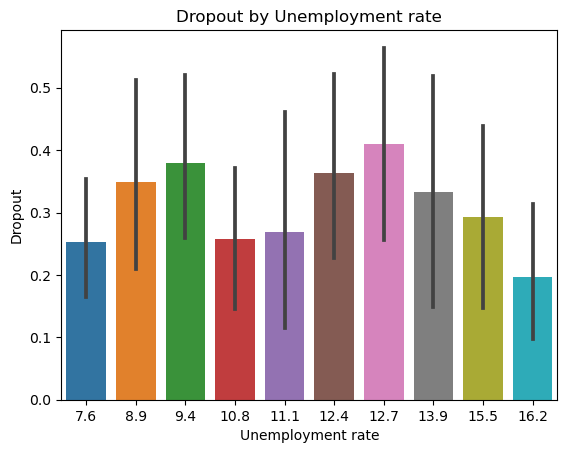

In [315]:
sns.barplot(x='Unemployment rate',y='Dropout',data=drop)
plt.title('Dropout by Unemployment rate')

    4.0 Exploration by Family crisis

In [380]:
#from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(drop["Family crisis"],drop['Dropout'])
print(contingency_table)
chi_model=chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi_model)

Dropout          0   1
Family crisis         
0              180  61
1              137  84
(8.0518884014918, 0.004545624755849355, 1, array([[165.36147186,  75.63852814],
       [151.63852814,  69.36147186]]))


Text(0.5, 1.0, 'Dropout by Family crisis')

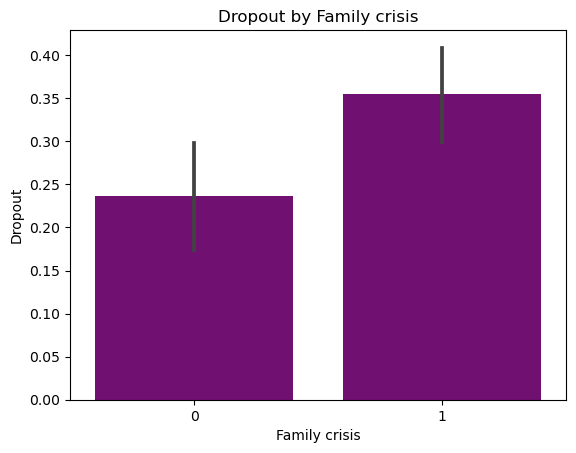

In [392]:
#drop['Family crisis']=drop['Academic stress and anxiety']

# Fraction of values in 'Family crisis' to change 
fraction_to_change = 0.3

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop.sample(n=num_rows_to_change).index

# Change the values in the selected rows of 'Family crisis'
new_value = 1
  
drop.loc[rows_to_change, 'Family crisis'] = new_value



# Fraction of specific values in 'ColumnA' to change 
#fraction_to_change = 0.4

# Identify specific values in 'ColumnA' to change
#values_to_change = [1]

# Number of rows to change based on the fraction
#num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
#rows_to_change = drop[drop['Family crisis'].isin(values_to_change)].sample(n=num_rows_to_change,replace=True).index

# Set a specific value in 'ColumnB' on the selected rows
#new_value_in_column_b = 1 # Replace 0 with the desired new value
#drop.loc[rows_to_change, 'Dropout'] = new_value_in_column_b


sns.barplot(x='Family crisis',y='Dropout',data=drop,color='purple')
plt.title('Dropout by Family crisis')

    Exploration by peer influence

In [381]:
#from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(drop["Peer influence"],drop['Dropout'])
print(contingency_table)
chi_model=chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi_model)

Dropout           0   1
Peer influence         
0               188  92
1               129  53
(0.5520484231313133, 0.4574819154607904, 1, array([[192.12121212,  87.87878788],
       [124.87878788,  57.12121212]]))


Text(0.5, 1.0, 'Dropout by Peer influence')

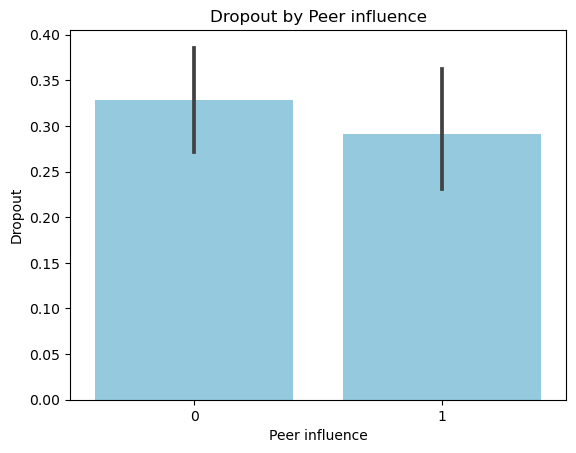

In [343]:
#drop['Peer influence']=drop['Gender']
# Fraction of values in 'Gender' to change 
fraction_to_change = 0.6

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop.sample(n=num_rows_to_change).index

# Change the values in the selected rows of 'Peer influence'
new_value = 0  
drop.loc[rows_to_change, 'Peer influence'] = new_value
sns.barplot(x='Peer influence',y='Dropout',data=drop,color='skyblue')
plt.title('Dropout by Peer influence')

    Exploration by Health status

In [382]:
#from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(drop["Health status"],drop['Dropout'])
print(contingency_table)
chi_model=chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(chi_model)

Dropout          0    1
Health status          
0               45   45
1              272  100
(16.927525255892455, 3.883436695714838e-05, 1, array([[ 61.75324675,  28.24675325],
       [255.24675325, 116.75324675]]))


Text(0.5, 1.0, 'Dropout by Health status')

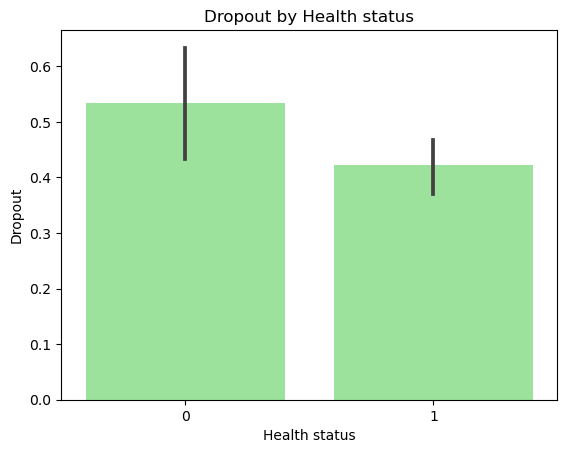

In [167]:
drop['Health status']=drop['School fees upto date']
data = {'ColumnA': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
df = pd.DataFrame(data)
# Fraction of values in 'Health status' to change 
fraction_to_change = 0.07

# Number of rows to change based on the fraction
num_rows_to_change = int(len(drop) * fraction_to_change)

# Randomly select rows to change
rows_to_change = drop.sample(n=num_rows_to_change).index

# Change the values in the selected rows of 'Health status'
new_value = 1  
drop.loc[rows_to_change, 'Healt status'] = new_value

sns.barplot(x='Health status',y='Dropout',data=drop,color='lightgreen')
plt.title('Dropout by Health status')

In [ ]:
col_to_move='Dropout'
#drop=drop[[col for col in drop.columns if col != col_to_move]+[col_to_move]]
drop.head(15)

4.Logistic Regression Model

    4.1 Feature Selection

    4.1.1 Recursive Feature Elimination

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [360]:
cols = ["Gender","Academic stress and anxiety","Seek counselling and mental health support","Quality of teaching","Academic performance","Age",
        "School fees upto date","Scholarship holder","Unemployment rate",'Peer influence','Health status','Family crisis'] 
X = drop[cols]
y = drop['Dropout']
# Build a logreg and compute the feature importances
model = LogisticRegression(max_iter=1000)
# create the RFE model 
rfe = RFE(model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Academic stress and anxiety', 'Seek counselling and mental health support', 'Academic performance', 'School fees upto date', 'Health status', 'Family crisis']


    4.1.2 Feature ranking with recursive feature eliminetion and cross validation

In [359]:
#find the optimal or best number of features 
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(max_iter=200), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
#plt.figure(figsize=(8,6))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.grid_scores_)+ 1), rfecv.grid_scores_)
#plt.show()

Optimal number of features: 12
Selected features: ['Gender', 'Academic stress and anxiety', 'Seek counselling and mental health support', 'Quality of teaching', 'Academic performance', 'Age', 'School fees upto date', 'Scholarship holder', 'Unemployment rate', 'Peer influence', 'Health status', 'Family crisis']


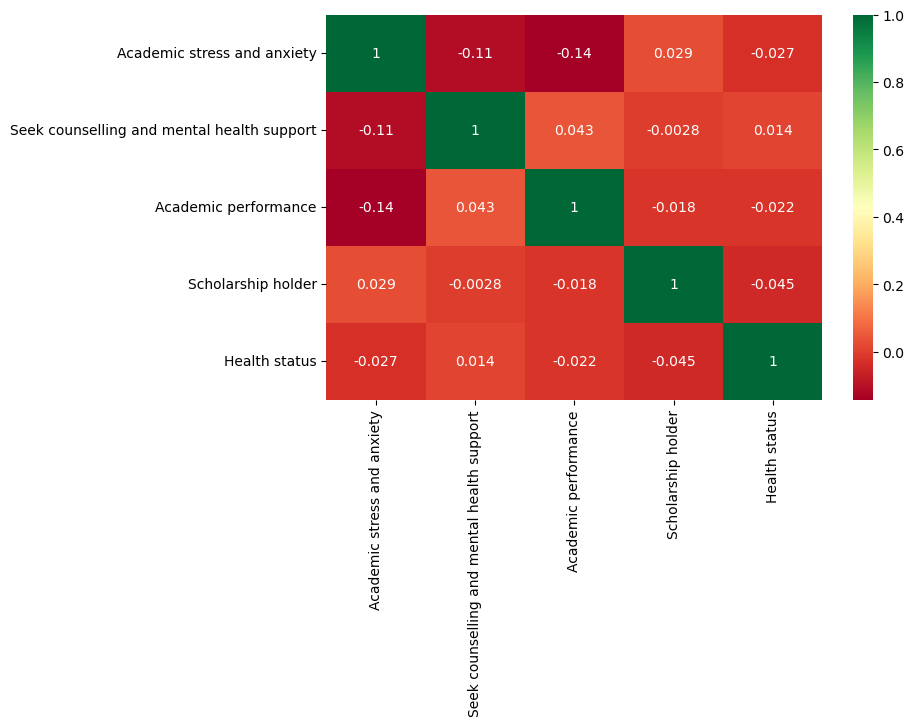

In [348]:
Selected_features = ['Academic stress and anxiety','Seek counselling and mental health support', 'Academic performance', 'Scholarship holder', 'Health status'
                    ]
X = drop[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")

plt.show()

    4.2 Model Building

In [393]:
from statsmodels.tools import add_constant as add_constant
drop_constant = add_constant(drop)
drop_constant.head()

c:\Users\evans\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Gender,Academic stress and anxiety,Seek counselling and mental health support,Quality of teaching,Academic performance,Age,School fees upto date,Scholarship holder,Unemployment rate,Family crisis,Health status,Peer influence,Dropout,Healt status,Seeking Couselling and Mental Support
0,1.0,1,1,1,3,3,20,1,0,10.8,1,1,1,1,NaN,0.0
1,1.0,0,1,0,3,2,21,1,0,16.2,1,1,1,0,NaN,NaN
2,1.0,0,1,0,4,5,20,1,0,16.2,1,1,1,1,NaN,1.0
3,1.0,1,1,0,4,4,29,0,0,15.5,1,0,0,1,NaN,1.0
4,1.0,1,0,0,3,5,19,1,0,8.9,1,1,1,0,NaN,NaN


In [394]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=['const','Academic performance','Seek counselling and mental health support','Academic stress and anxiety', 'Scholarship holder', 'Health status', 
                    'Family crisis','Peer influence','Unemployment rate','Gender','Age','Quality of teaching']
model=sm.Logit(drop.Dropout,drop_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.540150
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Dropout   No. Observations:                  462
Model:                          Logit   Df Residuals:                      450
Method:                           MLE   Df Model:                           11
Date:                Wed, 29 Nov 2023   Pseudo R-squ.:                  0.1318
Time:                        19:04:39   Log-Likelihood:                -249.55
converged:                       True   LL-Null:                       -287.43
Covariance Type:            nonrobust   LLR p-value:                 9.657e-12
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4467      0.864      0.517      0.605      -1.247       2.141
Academic performance                          -0.5111      0.135     -3.772      0.000      -0.777      -0.246
Seek counselling and mental health support    -0.5182      0.262     -1.981      0.048      -1.031      -0.006
Academic stress and anxiety                    1.0232      0.307      3.332      0.001       0.421       1.625
Scholarship holder                            -0.1777      0.333     -0.533      0.594      -0.831       0.476
Health status                                 -1.0959      0.261     -4.203      0.000      -1.607      -0.585
Family crisis                                  0.3448      0.251      1.375      0.169      -0.147       0.836
Peer influence                                -0.2238      0.228     -0.983      0.325      -0.670       0.222
Unemployment rate                             -0.0043      0.039     -0.108      0.914      -0.081       0.073
Gender                                        -0.2555      0.228     -1.122      0.262      -0.702       0.191
Age                                            0.0556      0.019      2.859      0.004       0.017       0.094
Quality of teaching                           -0.1671      0.129     -1.293      0.196      -0.420       0.086
==============================================================================================================
"""

In [389]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                                            CI 95%(2.5%)  CI 95%(97.5%)  \
const                                           0.337194      10.086734   
Academic performance                            0.454994       0.774339   
Seek counselling and mental health support      0.365367       1.014476   
Academic stress and anxiety                     1.357436       5.167703   
Scholarship holder                              0.428414       1.575380   
Health status                                   0.196838       0.548657   
Family crisis                                   0.774524       2.095654   
Peer influence                                  0.514824       1.254670   
Unemployment rate                               0.922158       1.075804   
Gender                                          0.501758       1.223895   
Age                                             1.017417       1.097744   
Quality of teaching                             0.663089       1.098398   

                        

4.3 Model Evaluation

    4.3.1 Model Evaluation based on simple Train/Test/Split

Train/Test split results:
LogisticRegression accuracy is 0.753
LogisticRegression log_loss is 0.531
LogisticRegression auc is 0.724


C:\Users\evans\AppData\Local\Temp\ipykernel_9648\1591377719.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
C:\Users\evans\AppData\Local\Temp\ipykernel_9648\1591377719.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


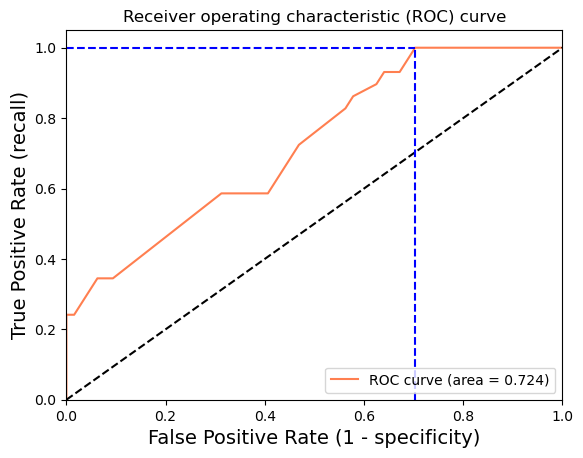

Using a threshold of 0.172 guarantees a sensitivity of 1.000 and a specificity of 0.297, i.e. a false positive rate of 70.31%.


In [331]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.preprocessing import StandardScaler
# create X (features) and y (response)
X = drop[Selected_features]
y = drop['Dropout']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply logistic regression with L2 regularization
# check classification scores of logistic regression
logreg = LogisticRegression(penalty='l2', solver='liblinear')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [332]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.708
LogisticRegression average log_loss is 0.567
LogisticRegression average auc is 0.691
